In [ ]:
input('Warning: contains solution spoilers. Press enter to continue.')
import numpy as np
import matplotlib.pyplot as plt
import time

# Problem set 7

## Question 1

In [6]:
def gaussian_elimination(A, b):
    '''Solve Ax=b using Gaussian elimination.'''
    assert A.shape[0] == A.shape[1] == b.shape[0]
    M = np.vstack([A.T, b])
    M = M.T
    n = M.shape[0]
    
    def make_pivot_one(M, i):
        if M[i, i] == 0:
            '''Swap rows to make the pivot nonzero.'''
            for j in range(i+1, n):
                if M[j, i] != 0:
                    M[[i, j]] = M[[j, i]]
                    break
            else:
                raise ValueError('Matrix is singular.')
        M[i] /= M[i, i]
        return M
    
    def zero_out_column(M, i, inv=False):
        lst = range(i+1, n) if not inv else range(i)
        for j in lst:
            M[j] -= M[i] * M[j, i]
        return M
    
    for i in range(n):
        M = make_pivot_one(M, i)  # Forward elimination
        M = zero_out_column(M, i)  # Backwards substitution
    for i in range(n-1, -1, -1):  # Forwards substitution
        M = zero_out_column(M, i, inv=True)
    return M[:, -1]

In [ ]:
def test_method(fn, n, trys=3, A_n=None, x_sol_n=None):    
    res = []
    err = []
    t = []
    for _ in range(trys):
        np.random.seed(trys)
        if A_n is None:
            A = np.random.rand(n, n)
        else:
            A = A_n(n)
        if x_sol_n is None:
            x_sol = np.random.rand(n)
        else:
            x_sol = x_sol_n(n)
        b = A @ x_sol

        start = time.time()
        x = fn(A, b)
        t.append(time.time() - start)
        res.append(np.linalg.norm(A @ x - b))
        err.append(np.linalg.norm(x - x_sol))
    return np.average(res), np.average(err), np.average(t)

def test_methods(fns: dict, n_list, trys=3, A_n=None, x_sol_n=None):
    res = {}
    err = {}
    t = {}
    
    for name, fn in fns.items():
        res[name] = []
        err[name] = []
        t[name] = []
        for n in n_list:
            r, e, ti = test_method(fn, n, trys=trys, A_n=A_n, x_sol_n=x_sol_n)
            res[name].append(r)
            err[name].append(e)
            t[name].append(ti)
    return res, err, t

def plot_methods(fns, res, err, t, n_list):
    fig, ax = plt.subplots(1, 3, figsize=(14, 3))
    for name in fns.keys():
        ax[0].plot(n_list, res[name], '.-', label=name)
        ax[1].plot(n_list, err[name], '.-', label=name)
        ax[2].plot(n_list, t[name], '.-', label=name)

    ax[0].set_title('Residual norm')
    ax[0].set_xlabel('Matrix size')
    ax[0].set_ylabel('Residual norm')

    ax[1].set_title('Error norm')
    ax[1].set_xlabel('Matrix size')
    ax[1].set_ylabel('Error norm')

    ax[2].set_title('Time')
    ax[2].set_xlabel('Matrix size')
    ax[2].set_ylabel('Time (s)')

    for _ax in ax:
        _ax.set_xscale('log')
        _ax.set_yscale('log')
        _ax.legend()
    ax[2].set_yscale('symlog', linthresh=1e-3)


    plt.tight_layout()
    plt.show()

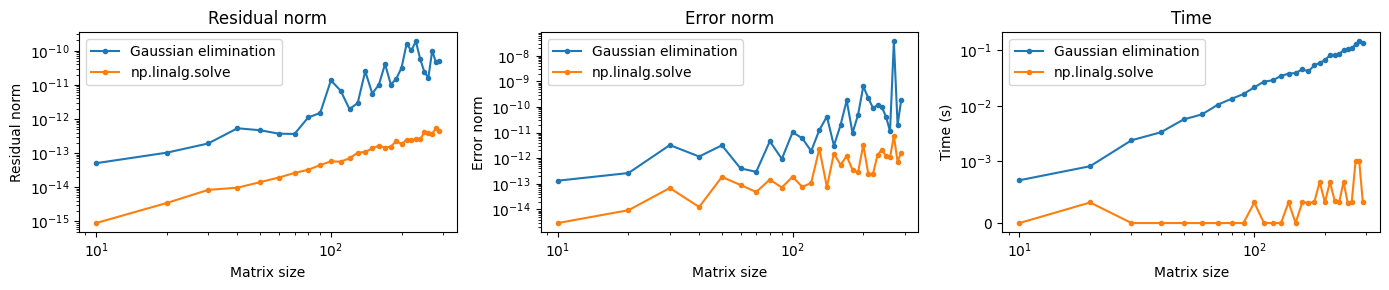

In [22]:
n_list = np.arange(10, 300, 10)
fns = {'Gaussian elimination': gaussian_elimination, 'np.linalg.solve': np.linalg.solve}
res, err, t = test_methods(fns, n_list)
plot_methods(fns, res, err, t, n_list)

## Problem 2

In [23]:
def LU_decomposition(A, b):
    '''Solve Ax=b using LU decomposition.'''
    assert A.shape[0] == A.shape[1] == b.shape[0]
    n = A.shape[0]
    L = np.eye(n)
    U = A.copy()
    
    # LU decomposition
    for i in range(n):
        for j in range(i+1, n):
            L[j, i] = U[j, i] / U[i, i]
            U[j] -= L[j, i] * U[i]
    
    # Forward substitution
    y = np.zeros(n)
    for i in range(n):
        y[i] = b[i] - L[i] @ y
    
    # Backward substitution
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - U[i] @ x) / U[i, i]
    return x

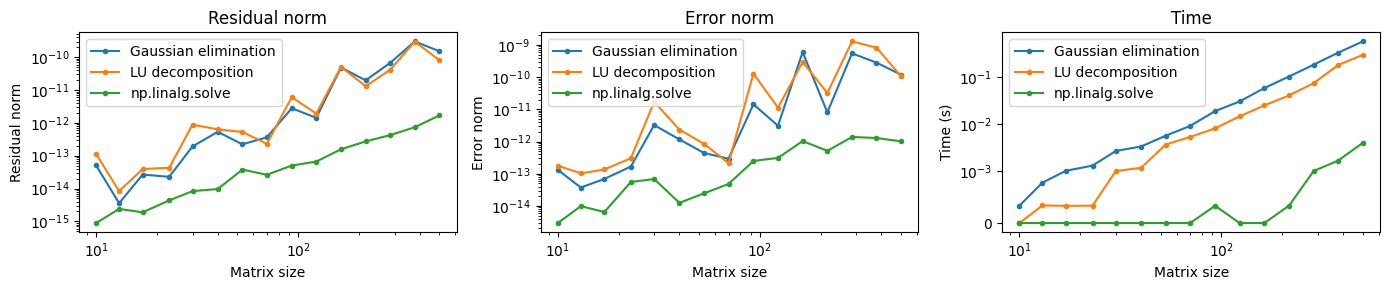

In [24]:
n_list = np.logspace(1, 2.7, 15, dtype=int)
fns = {'Gaussian elimination': gaussian_elimination,
       'LU decomposition': LU_decomposition,
       'np.linalg.solve': np.linalg.solve,}
res, err, t = test_methods(fns, n_list)
plot_methods(fns, res, err, t, n_list)

Verdict: LU is slightly better than GE. But you really should be using premade optimised code (i.e. `np.linalg.solve`), especially for dense unstructured matrices. Use something like `scipy.sparse` for sparse matrices.

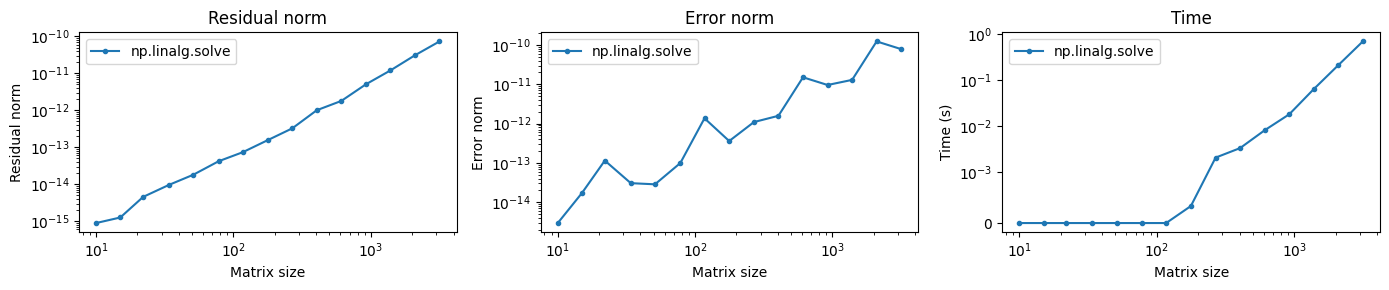

In [25]:
n_list = np.logspace(1, 3.5, 15, dtype=int)
fns = {'np.linalg.solve': np.linalg.solve,}
res, err, t = test_methods(fns, n_list)
plot_methods(fns, res, err, t, n_list)